<a href="https://colab.research.google.com/github/GulsahDurmaz/redi_fall2024_data_circle_twitter_project/blob/main/Data_Circle_US_Election_2020_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Set

### Context

The 2020 US election is set for **November 3, 2020**, and its global impact will be significant, regardless of the winner. After reading two relevant papers ([linked here](#) and [here](#)), I was inspired to conduct my own sentiment analysis.

### Why Twitter?

Social media platforms like Facebook and Twitter have transformed how we interact and share news. As of June 2019, Twitter had over 348M users posting 500M tweets daily, enabling users to influence trends and shape news coverage.

Twitter has become increasingly important in electoral campaigning, with politicians and parties actively using the platform. This rise in political activity on Twitter has attracted researchers' interest, making election prediction based on Twitter data a popular field. Researchers now analyze citizen sentiment to estimate candidate performance in elections.

### Content

Tweets were collected using the Twitter API `statuses_lookup` and `snsscrape` for specific keywords. The original goal was to update the dataset daily to cover the period from **October 15 to November 4, 2020**.

- **Added on November 6, 2020**: As the election events continue, I decided to keep updating the dataset until at least the end of November 6.
- **Added on November 8, 2020**: One final version will include tweets up until the end of November 8.

### Data Source and Acknowledgment

The data and content described here are originally from **MANCH HUI**'s Kaggle profile. This information was adapted from their dataset, and can be found at their [Kaggle profile](https://www.kaggle.com/manchunhui). All credit for the dataset collection and updates goes to them.



You can download the dataset from [this](https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data) link.

The dataset contains 21 features :

| No  | Column Name          | Description                                              |
|-----|----------------------|----------------------------------------------------------|
| 1   | created_at           | Date and time of tweet creation                          |
| 2   | tweet_id             | Unique ID of the tweet                                   |
| 3   | tweet                | Full tweet text                                          |
| 4   | likes                | Number of likes                                          |
| 5   | retweet_count        | Number of retweets                                       |
| 6   | source               | Utility used to post the tweet                           |
| 7   | user_id              | User ID of tweet creator                                 |
| 8   | user_name            | Username of tweet creator                                |
| 9   | user_screen_name     | Screen name of tweet creator                             |
| 10  | user_description     | Description of self by tweet creator                     |
| 11  | user_join_date       | Join date of tweet creator                               |
| 12  | user_followers_count | Followers count of tweet creator                         |
| 13  | user_location        | Location given on tweet creator's profile                |
| 14  | lat                  | Latitude parsed from user_location                       |
| 15  | long                 | Longitude parsed from user_location                      |
| 16  | city                 | City parsed from user_location                           |
| 17  | country              | Country parsed from user_location                        |
| 18  | state                | State parsed from user_location                          |
| 19  | state_code           | State code parsed from user_location                     |
| 20  | collected_at         | Date and time tweet data was mined from Twitter          |


# Importing Libraries and Dataset

Here we are using the following libraries:

- **Pandas**: To load and manipulate the dataset efficiently as a DataFrame.
- **NumPy**: For numerical operations and handling arrays.
- **Matplotlib**: To create static, animated, and interactive visualizations, such as bar plots.
- **Seaborn**: To create more sophisticated and aesthetically pleasing visualizations, such as correlation heatmaps, and to visualize relationships between features.
- **Streamlit**: For building interactive web applications to showcase data analysis and visualizations.
- **Plotly Express**: To create interactive visualizations like scatter plots and bar charts.
- **NLTK (Natural Language Toolkit)**: Specifically, the `sent_tokenize` function is used to tokenize sentences, splitting the text into individual sentences.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
import pycountry
from nltk.tokenize import sent_tokenize

In [2]:
# trump_df = pd.read_csv(r"/content/sample_data/hashtag_donaldtrump.csv",lineterminator='\n')
# biden_df = pd.read_csv(r"/content/sample_data/hashtag_joebiden.csv",lineterminator='\n')
trump_df = pd.read_csv(r"/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/csv/hashtag_donaldtrump.csv",lineterminator='\n')
biden_df = pd.read_csv(r"/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/csv/hashtag_joebiden.csv",lineterminator='\n')

In [3]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [4]:
biden_df.head(100)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-10-15 00:06:17,1.316531e+18,@JoeBiden Where’s #JoeBiden hiding out? https:...,0.0,0.0,Twitter for iPad,1.190418e+18,Buck Fullerton,BuckFullerton,"Proud conservative husband, father, and CEO - ...",...,868.0,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:50.747073736
96,2020-10-15 00:06:17,1.316531e+18,I still can't retweet this @nypost report on #...,2.0,2.0,Twitter Web App,7.697845e+07,Tim Sumner an America 🇺🇸,SgtTim911,Co-founded 9/11 Families for a Safe & Strong A...,...,2058.0,U.S.A,31.193277,30.054019,NaN,Egypt,Africa,Alexandria Governorate,NaN,2020-10-21 00:00:51.264901019
97,2020-10-15 00:06:23,1.316531e+18,@JohnBro85286904 @jane3wallace @Anderology @Jo...,1.0,0.0,Twitter for Android,2.265869e+09,Debbie,debc819,Mother of 2..looking to help keep our country ...,...,439.0,Down South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:51.782728302
98,2020-10-15 00:06:30,1.316531e+18,@MeidasTouch VOTE wisely.\nand by wisely I mea...,202.0,51.0,Twitter Web App,5.436168e+07,Ginger Kitty,icecreamonacone,I'm just a ginger kitty. I'm chill for the mos...,...,1701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:52.300555585


In [5]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

# Data Preprocessing

We categorize the features based on their data type (int, float, object) and calculate the count for each. Finally, we convert the object data type into the appropriate types as needed.

In [6]:
obj_ = (trump_df.dtypes == 'object')

object_cols = list(obj_[obj_].index)

print("Categorical variables:",len(object_cols))

int_ = (trump_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl_ = (trump_df.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Categorical variables: 14
Integer variables: 0
Float variables: 7


In [7]:
obj_ = (biden_df.dtypes == 'object')

object_cols = list(obj_[obj_].index)

print("Categorical variables:",len(object_cols))

int_ = (biden_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl_ = (biden_df.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Categorical variables: 14
Integer variables: 0
Float variables: 7


In [8]:
# Converting date values (data type: object) to datetime format
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'])
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'])

In [9]:
# drop non necesssary columns
trump_df = trump_df.drop(columns= ['tweet_id', 'lat', 'long', 'continent'])
trump_df.shape

(970919, 17)

In [10]:
# drop non necesssary columns
biden_df = biden_df.drop(columns= ['tweet_id', 'lat', 'long', 'continent'])
biden_df.shape

(776886, 17)

# Exploratory Data Analysis - Global

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all variables.


<function matplotlib.pyplot.show(close=None, block=None)>

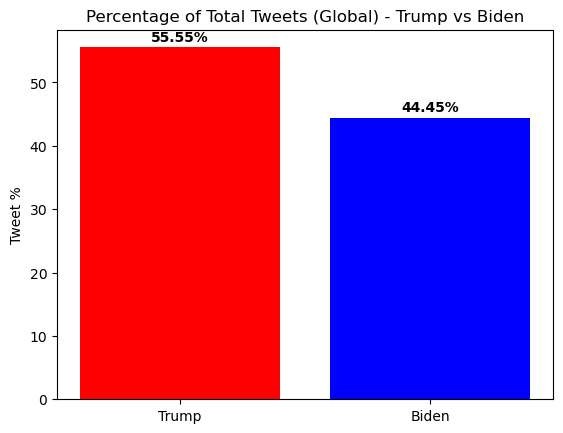

In [11]:
# Percentage of Total Tweets - Trump vs Biden
trump_tweet_count = trump_df.shape[0]
biden_tweet_count = biden_df.shape[0]

total_tweet_count = trump_tweet_count + biden_tweet_count
trump_tweet_percentage = (trump_tweet_count / total_tweet_count) * 100
biden_tweet_percentage = (biden_tweet_count / total_tweet_count) * 100

tweet_percentage = {'Trump': trump_tweet_percentage, 'Biden': biden_tweet_percentage}

labels = list(tweet_percentage.keys())
values = list(tweet_percentage.values())

plt.bar(labels, values, color=['red', 'blue'])
plt.ylabel('Tweet %')
plt.title('Percentage of Total Tweets (Global) - Trump vs Biden')

for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show

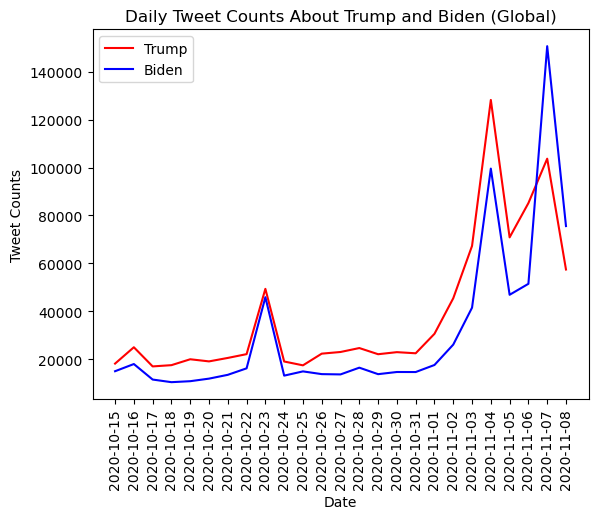

<Figure size 1400x700 with 0 Axes>

In [12]:
# Daily Tweet Counts About Trump and Biden
t_tweets_per_day = trump_df.groupby(trump_df['created_at'].dt.date).size()
b_tweets_per_day = biden_df.groupby(biden_df['created_at'].dt.date).size()

plt.plot(t_tweets_per_day.index, t_tweets_per_day.values, label='Trump', color='Red')
plt.plot(b_tweets_per_day.index, b_tweets_per_day.values, label='Biden', color='Blue')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Daily Tweet Counts About Trump and Biden (Global)')
plt.legend()
plt.gca().set_xticks(t_tweets_per_day.index)
plt.gca().set_xticklabels(t_tweets_per_day.index, rotation=90)
plt.figure(figsize=(14,7))
plt.show()

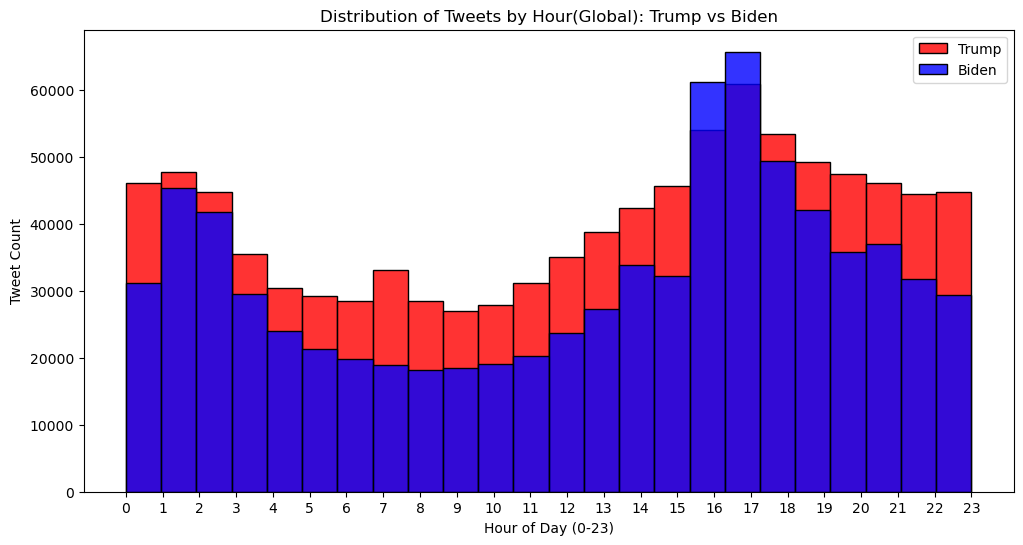

In [13]:
# Expl 2: Investigate Distribution of Hour of Tweets
trump_df.loc[:, 'tweet_hour'] = trump_df['created_at'].dt.hour
biden_df.loc[:, 'tweet_hour'] = biden_df['created_at'].dt.hour

plt.figure(figsize=(12,6))

sns.histplot(trump_df['tweet_hour'], bins=24, kde=False, color='red', label='Trump', alpha=0.8)
sns.histplot(biden_df['tweet_hour'], bins=24, kde=False, color='blue', label='Biden', alpha=0.8)

plt.title('Distribution of Tweets by Hour(Global): Trump vs Biden')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tweet Count')
plt.xticks(range(0, 24))  # Show all hours on the x-axis
plt.legend()  # Show the legend to distinguish Trump and Biden
plt.grid(False)

plt.show()

# Data Cleaning

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the analysis. So, we can drop them. There are 2 approaches to dealing with empty/null values

- We can easily delete the column/row (if the feature or record is not much important).
- Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
- As Id Column will not be participating in any prediction. So we can Drop it.

In [14]:
# Missing values
percentage_empty_cell_trump = ((trump_df.isnull().sum() / trump_tweet_count)*100).round(2)
print("Trump\n", percentage_empty_cell_trump)

percentage_empty_cell_biden = ((biden_df.isnull().sum() / biden_tweet_count)*100).round(2)
print("Biden\n", percentage_empty_cell_biden)

# Outliers

# Duplicates

# Erroneous data

# Inconsistencies

Trump
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.09
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description        10.43
user_join_date           0.00
user_followers_count     0.00
user_location           30.38
city                    76.60
country                 54.40
state                   66.98
state_code              69.06
collected_at             0.00
tweet_hour               0.00
dtype: float64
Biden
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.09
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description        10.56
user_join_date           0.00
user_followers_count     0.00
user_location           30.09
city                    75.95
country                 54.46
state      

In [15]:
# check duplicates

trump_df['country'].unique()

array(['United States of America', nan, 'United Kingdom', 'Germany',
       'United States', 'Australia', 'Costa Rica', 'Barbados', 'Cameroon',
       'The Netherlands', 'Mexico', 'Canada', 'France', 'Peru',
       'Argentina', 'South Korea', 'Finland', 'Mongolia', 'India',
       'Japan', 'Turkey', 'Switzerland', 'Iran', 'Portugal', 'Ireland',
       'Russia', 'Greece', 'Egypt', 'Ecuador', 'Colombia', 'Sri Lanka',
       'Italy', 'China', 'Malaysia', 'Indonesia', 'Venezuela', 'Thailand',
       'Sweden', 'Nepal', 'Bangladesh', 'Philippines',
       'Dominican Republic', 'New Zealand', 'Chile', 'Honduras',
       'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Be

In [16]:
# combine 'United States of America' and 'United States'

country_mapping = {
    'United States of America': 'United States',
    'USA': 'United States'
}
trump_df['country'] = trump_df['country'].replace(country_mapping)
biden_df['country'] = biden_df['country'].replace(country_mapping)
trump_df['country'].unique()

array(['United States', nan, 'United Kingdom', 'Germany', 'Australia',
       'Costa Rica', 'Barbados', 'Cameroon', 'The Netherlands', 'Mexico',
       'Canada', 'France', 'Peru', 'Argentina', 'South Korea', 'Finland',
       'Mongolia', 'India', 'Japan', 'Turkey', 'Switzerland', 'Iran',
       'Portugal', 'Ireland', 'Russia', 'Greece', 'Egypt', 'Ecuador',
       'Colombia', 'Sri Lanka', 'Italy', 'China', 'Malaysia', 'Indonesia',
       'Venezuela', 'Thailand', 'Sweden', 'Nepal', 'Bangladesh',
       'Philippines', 'Dominican Republic', 'New Zealand', 'Chile',
       'Honduras', 'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Belgium', 'Lebanon',
       'Austria'

In [17]:
# combine 'The Netherlands', 'Netherlands'

country_mapping2 = {
    'The Netherlands': 'Netherlands',
}
trump_df['country'] = trump_df['country'].replace(country_mapping2)
biden_df['country'] = biden_df['country'].replace(country_mapping2)
trump_df['country'].unique()

array(['United States', nan, 'United Kingdom', 'Germany', 'Australia',
       'Costa Rica', 'Barbados', 'Cameroon', 'Netherlands', 'Mexico',
       'Canada', 'France', 'Peru', 'Argentina', 'South Korea', 'Finland',
       'Mongolia', 'India', 'Japan', 'Turkey', 'Switzerland', 'Iran',
       'Portugal', 'Ireland', 'Russia', 'Greece', 'Egypt', 'Ecuador',
       'Colombia', 'Sri Lanka', 'Italy', 'China', 'Malaysia', 'Indonesia',
       'Venezuela', 'Thailand', 'Sweden', 'Nepal', 'Bangladesh',
       'Philippines', 'Dominican Republic', 'New Zealand', 'Chile',
       'Honduras', 'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Saudi Arabia', 'Norway', 'Singapore', 'Cuba', 'Niger', 'Hungary',
       'Greenland', 'United Arab Emirates', 'Brazil', 'Uganda',
       'Guatemala', 'Pakistan', 'Taiwan', 'Qatar', 'Afghanistan',
       'South Africa', 'Nigeria', 'Slovakia', 'Guyana', 'Kenya', 'Iraq',
       'Denmark', 'Uruguay', 'Belgium', 'Lebanon', 'Austria',
       'Liechtenstein', 

In [18]:
trump_usa_count = trump_df[trump_df['country'] == 'United States'].shape[0]
print(f"Number of tweets from USA: {trump_usa_count}")

trump_usa_percentage = (trump_usa_count / total_tweet_count) * 100
trump_usa_percentage = np.round(trump_usa_percentage, 2)
print(f"Percentage of tweets USA/total: {trump_usa_percentage}")

Number of tweets from USA: 213263
Percentage of tweets USA/total: 12.2


In [19]:
biden_usa_count = biden_df[biden_df['country'] == 'United States'].shape[0]
print(f"Number of tweets from USA: {biden_usa_count}")

biden_usa_percentage = (biden_usa_count / total_tweet_count) * 100
biden_usa_percentage = np.round(biden_usa_percentage, 2)
print(f"Percentage of tweets USA/total: {biden_usa_percentage}")

Number of tweets from USA: 181137
Percentage of tweets USA/total: 10.36


In [20]:
# Group by country and count tweets
trump_grouped = trump_df.groupby('country')['tweet'].count().reset_index(name='trump_grouped')
biden_grouped = biden_df.groupby('country')['tweet'].count().reset_index(name='biden_grouped')

# Merge the grouped DataFrames on 'country'
combined_df = pd.merge(trump_grouped, biden_grouped, on='country', how='outer')

# Fill NaN values with 0
combined_df.fillna(0, inplace=True)

# Convert tweet counts to integers
combined_df['trump_grouped'] = combined_df['trump_grouped'].astype(int)
combined_df['biden_grouped'] = combined_df['biden_grouped'].astype(int)

# Total counts
combined_df['total_tweet_count'] = combined_df['trump_grouped'] + combined_df['biden_grouped']

combined_df['trump_percentage'] = (combined_df['trump_grouped'] / combined_df['total_tweet_count'] * 100).round(2)
combined_df['biden_percentage'] = (combined_df['biden_grouped'] / combined_df['total_tweet_count'] * 100).round(2)

#combined_df['usa_percentage_total'] = (combined_df['total_tweet_count'] / combined_df['total_tweets_overall'] * 100).round(2)

# Sort and show the first 10 countries
combined_df = combined_df.sort_values(by='total_tweet_count', ascending=False)

# Display the combined DataFrame
combined_df.head(10)

,country,trump_grouped,biden_grouped,total_tweet_count,trump_percentage,biden_percentage
177,United States,213263,181137,394400,54.07,45.93
176,United Kingdom,34743,23308,58051,59.85,40.15
74,India,18559,21532,40091,46.29,53.71
60,Germany,22618,12761,35379,63.93,36.07
57,France,20689,14610,35299,58.61,41.39
27,Canada,16996,10809,27805,61.13,38.87
81,Italy,11206,8870,20076,55.82,44.18
8,Australia,9365,5534,14899,62.86,37.14
115,Netherlands,8605,6261,14866,57.88,42.12
106,Mexico,5811,5092,10903,53.30,46.70


In [21]:
# Function to get ISO Alpha-3 country code
def get_country_code(country_name):
    try:
        # Use pycountry to get the country object
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None  # If the country name is not found, return None

# Apply the function to the 'country' column to create a new 'country_code' column
combined_df['country_code'] = combined_df['country'].apply(get_country_code)

combined_df.head(10)

,country,trump_grouped,biden_grouped,total_tweet_count,trump_percentage,biden_percentage,country_code
177,United States,213263,181137,394400,54.07,45.93,USA
176,United Kingdom,34743,23308,58051,59.85,40.15,GBR
74,India,18559,21532,40091,46.29,53.71,IND
60,Germany,22618,12761,35379,63.93,36.07,DEU
57,France,20689,14610,35299,58.61,41.39,FRA
27,Canada,16996,10809,27805,61.13,38.87,CAN
81,Italy,11206,8870,20076,55.82,44.18,ITA
8,Australia,9365,5534,14899,62.86,37.14,AUS
115,Netherlands,8605,6261,14866,57.88,42.12,NLD
106,Mexico,5811,5092,10903,53.30,46.70,MEX


In [22]:
combined_df[combined_df['country_code'].isnull()]

,country,trump_grouped,biden_grouped,total_tweet_count,trump_percentage,biden_percentage,country_code
171,Turkey,5594,4774,10368,53.95,46.05,None
138,Russia,434,442,876,49.54,50.46,None
82,Jamaika,190,158,348,54.60,45.40,None
126,Palestinian Territory,69,45,114,60.53,39.47,None
89,Kosovo,46,64,110,41.82,58.18,None
166,The Bahamas,39,41,80,48.75,51.25,None
167,The Gambia,32,10,42,76.19,23.81,None
34,Congo-Brazzaville,12,14,26,46.15,53.85,None
181,Vatican City,14,8,22,63.64,36.36,None
52,Falkland Islands,4,15,19,21.05,78.95,None


In [23]:
# Define a mapping for the missing country codes
missing_country_codes = {
    'Turkey': 'TUR',
    'Russia': 'RUS',
    'Jamaika': 'JAM',
    'Palestinian Territory': 'PSE',
    'Kosovo': 'XKX',  # Kosovo is often represented with 'XKX'
    'The Bahamas': 'BHS',
    'The Gambia': 'GMB',
    'Congo-Brazzaville': 'COG',
    'Vatican City': 'VAT',
    'Falkland Islands': 'FLK',
    'Democratic Republic of the Congo': 'COD',
    'Cape Verde': 'CPV',
    'East Timor': 'TLS'
}

# Fill in the missing country codes
combined_df['country_code'] = combined_df.apply(
    lambda row: missing_country_codes.get(row['country'], row['country_code']),
    axis=1
)

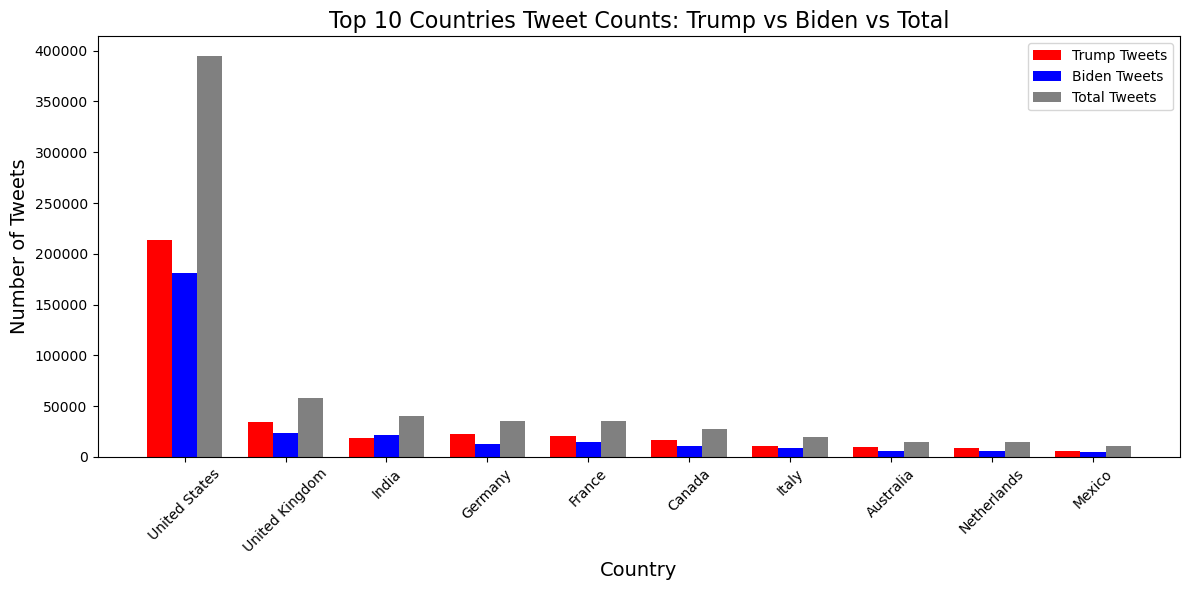

In [24]:
# Get the top 10 countries based on total tweet counts
top_countries = combined_df.head(10)

# Set the position of bars on the x-axis
bar_width = 0.25
x = range(len(top_countries))

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plot Trump tweets
plt.bar(x, top_countries['trump_grouped'], width=bar_width, label='Trump Tweets', color='red', align='center')

# Plot Biden tweets
plt.bar([p + bar_width for p in x], top_countries['biden_grouped'], width=bar_width, label='Biden Tweets', color='blue', align='center')

# Plot Total tweets
plt.bar([p + bar_width*2 for p in x], top_countries['total_tweet_count'], width=bar_width, label='Total Tweets', color='gray', align='center')

# Adding labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.title('Top 10 Countries Tweet Counts: Trump vs Biden vs Total', fontsize=16)
plt.xticks([p + bar_width for p in x], top_countries['country'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
# Calculate color mapping based on percentage difference
combined_df['color'] = combined_df['trump_percentage'] - combined_df['biden_percentage']

# Create a choropleth map
fig = px.choropleth(
    combined_df,
    locations='country_code',  # Column with country ISO Alpha-3 codes
    color='color',  # Column for the color scale
    color_continuous_scale=[(1, 'red'), (0, 'blue')],
    range_color=[-100, 100],  # Adjust based on your data
    scope="world",  # Display the entire world
    title='Biden vs Trump Tweet Percentages by Country',
    hover_name='country_code',  # Show the country code on hover
    hover_data={
        'trump_percentage': True,  # Display Trump percentage
        'biden_percentage': True,  # Display Biden percentage
        'color': False  # Do not display the difference
    }
)

# Update layout for better visualization
fig.update_geos(showcoastlines=True, coastlinecolor="Gray", showland=True, landcolor="white")
fig.update_layout(title_x=0.5)

# Display the figure
fig.show()


# Exploratory Data Analysis - Only USA Users

In [44]:
# Create a new DataFrame with only USA data
usa_trump_df = trump_df[trump_df['country'] == 'United States']
usa_trump_df.shape

(213263, 18)

In [45]:
usa_biden_df = biden_df[biden_df['country'] == 'United States']
usa_biden_df.shape

(181137, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

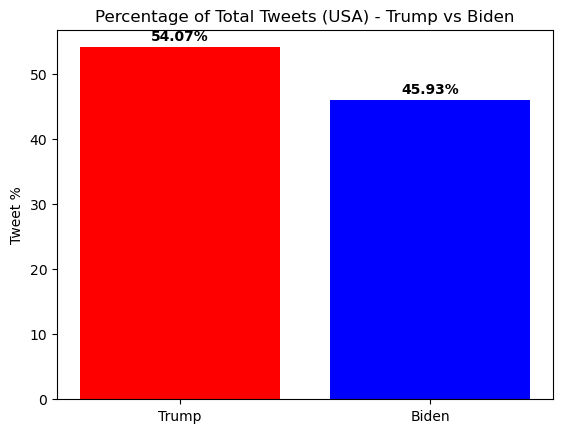

In [47]:
# Percentage of Total Tweets (USA) - Trump vs Biden
trump_tweet_count_usa = usa_trump_df.shape[0]
biden_tweet_count_usa = usa_biden_df.shape[0]

total_tweet_count_usa = trump_tweet_count_usa + biden_tweet_count_usa
trump_tweet_percentage_usa = (trump_tweet_count_usa / total_tweet_count_usa) * 100
biden_tweet_percentage_usa = (biden_tweet_count_usa / total_tweet_count_usa) * 100

tweet_percentage_usa = {'Trump': trump_tweet_percentage_usa, 'Biden': biden_tweet_percentage_usa}

labels = list(tweet_percentage_usa.keys())
values = list(tweet_percentage_usa.values())

plt.bar(labels, values, color=['red', 'blue'])
plt.ylabel('Tweet %')
plt.title('Percentage of Total Tweets (USA) - Trump vs Biden')

for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show

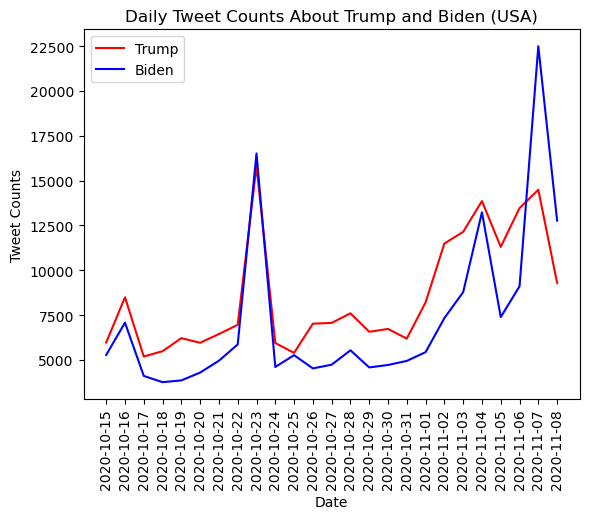

<Figure size 1400x700 with 0 Axes>

In [48]:
# Daily Tweet Counts About Trump and Biden
t_tweets_per_day = usa_trump_df.groupby(usa_trump_df['created_at'].dt.date).size()
b_tweets_per_day = usa_biden_df.groupby(usa_biden_df['created_at'].dt.date).size()

plt.plot(t_tweets_per_day.index, t_tweets_per_day.values, label='Trump', color='Red')
plt.plot(b_tweets_per_day.index, b_tweets_per_day.values, label='Biden', color='Blue')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Daily Tweet Counts About Trump and Biden (USA)')
plt.legend()
plt.gca().set_xticks(t_tweets_per_day.index)
plt.gca().set_xticklabels(t_tweets_per_day.index, rotation=90)
plt.figure(figsize=(14,7))
plt.show()

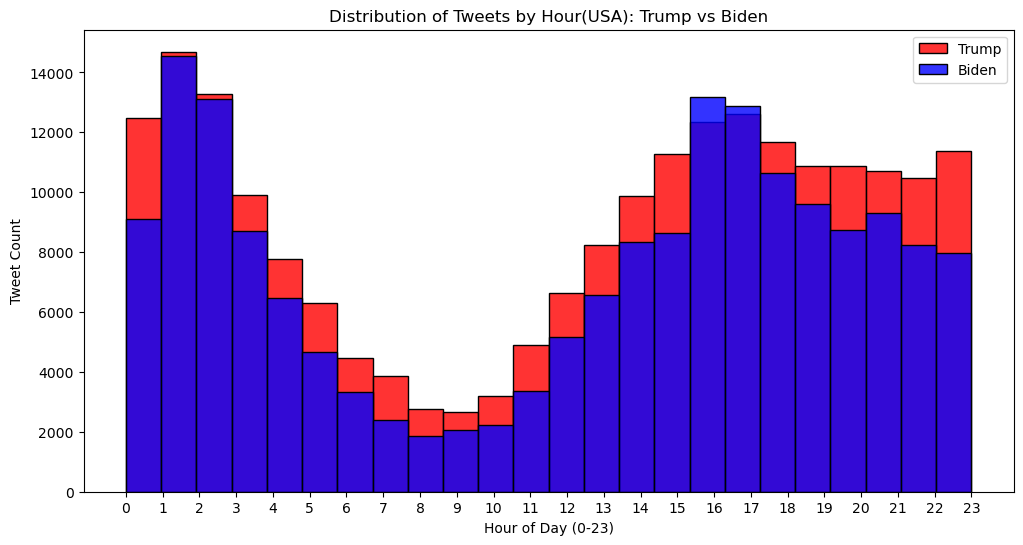

In [49]:
# Expl 2: Investigate Distribution of Hour of Tweets
usa_trump_df.loc[:, 'tweet_hour'] = usa_trump_df['created_at'].dt.hour
usa_biden_df.loc[:, 'tweet_hour'] = usa_biden_df['created_at'].dt.hour

plt.figure(figsize=(12,6))

sns.histplot(usa_trump_df['tweet_hour'], bins=24, kde=False, color='red', label='Trump', alpha=0.8)
sns.histplot(usa_biden_df['tweet_hour'], bins=24, kde=False, color='blue', label='Biden', alpha=0.8)

plt.title('Distribution of Tweets by Hour(USA): Trump vs Biden')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tweet Count')
plt.xticks(range(0, 24))  # Show all hours on the x-axis
plt.legend()  # Show the legend to distinguish Trump and Biden
plt.grid(False)

plt.show()

In [50]:
# Missing values
percentage_empty_cell_trump_usa = ((usa_trump_df.isnull().sum() / trump_tweet_count_usa)*100).round(2)
print("Trump\n", percentage_empty_cell_trump_usa)

Trump
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.01
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description         5.84
user_join_date           0.00
user_followers_count     0.00
user_location            0.00
city                    52.19
country                  0.00
state                   16.12
state_code              16.12
collected_at             0.00
tweet_hour               0.00
dtype: float64


In [51]:
percentage_empty_cell_biden_usa = ((usa_biden_df.isnull().sum() / biden_tweet_count_usa)*100).round(2)
print("Biden\n", percentage_empty_cell_biden_usa)

Biden
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.00
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description         6.17
user_join_date           0.00
user_followers_count     0.00
user_location            0.00
city                    49.96
country                  0.00
state                   15.21
state_code              15.21
collected_at             0.00
tweet_hour               0.00
dtype: float64


In [52]:
# Trump - tweet counts according to states
usa_trump_grouped = usa_trump_df.groupby('state_code')['tweet'].count()
usa_trump_grouped.shape

(53,)

In [53]:
# Biden - tweet counts according to states
usa_biden_grouped = usa_biden_df.groupby('state_code')['tweet'].count()
usa_biden_grouped.shape

(54,)

In [54]:
usa_combined_df = pd.merge(usa_trump_grouped, usa_biden_grouped, on='state_code', how='outer')
usa_combined_df = usa_combined_df.rename(columns={'tweet_x': 'trump_tweets', 'tweet_y': 'biden_tweets'})
usa_combined_df = usa_combined_df.reset_index()
usa_combined_df = pd.merge(usa_combined_df, usa_biden_grouped, on='state_code', how='outer')

# NaN fill with  0
usa_combined_df['trump_tweets'].fillna(0, inplace=True)

usa_combined_df['trump_tweets'] = usa_combined_df['trump_tweets'].astype(int)

usa_combined_df['total_tweets'] = usa_combined_df['trump_tweets'] + usa_combined_df['biden_tweets']
usa_combined_df['total_tweets_overall'] = usa_combined_df['trump_tweets'].sum() + usa_combined_df['biden_tweets'].sum()

usa_combined_df['trump_percentage'] = (usa_combined_df['trump_tweets'] / usa_combined_df['total_tweets'] * 100).round(2)
usa_combined_df['biden_percentage'] = (usa_combined_df['biden_tweets'] / usa_combined_df['total_tweets'] * 100).round(2)

usa_combined_df['usa_percentage_total'] = (usa_combined_df['total_tweets'] / usa_combined_df['total_tweets_overall'] * 100).round(2)

usa_combined_df = usa_combined_df.sort_values(by='total_tweets', ascending=False)
usa_combined_df.head(10)

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/2040137906.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,state_code,trump_tweets,biden_tweets,tweet,total_tweets,total_tweets_overall,trump_percentage,biden_percentage,usa_percentage_total
4,CA,31149,25817,25817,56966,332467,54.68,45.32,17.13
36,NY,22881,21005,21005,43886,332467,52.14,47.86,13.20
46,TX,16491,14191,14191,30682,332467,53.75,46.25,9.23
9,FL,16559,13278,13278,29837,332467,55.50,44.50,8.97
7,DC,9684,7055,7055,16739,332467,57.85,42.15,5.03
40,PA,7011,5403,5403,12414,332467,56.48,43.52,3.73
15,IL,6777,5500,5500,12277,332467,55.20,44.80,3.69
33,NJ,5045,3961,3961,9006,332467,56.02,43.98,2.71
20,MA,4719,3738,3738,8457,332467,55.80,44.20,2.54
37,OH,3871,4413,4413,8284,332467,46.73,53.27,2.49


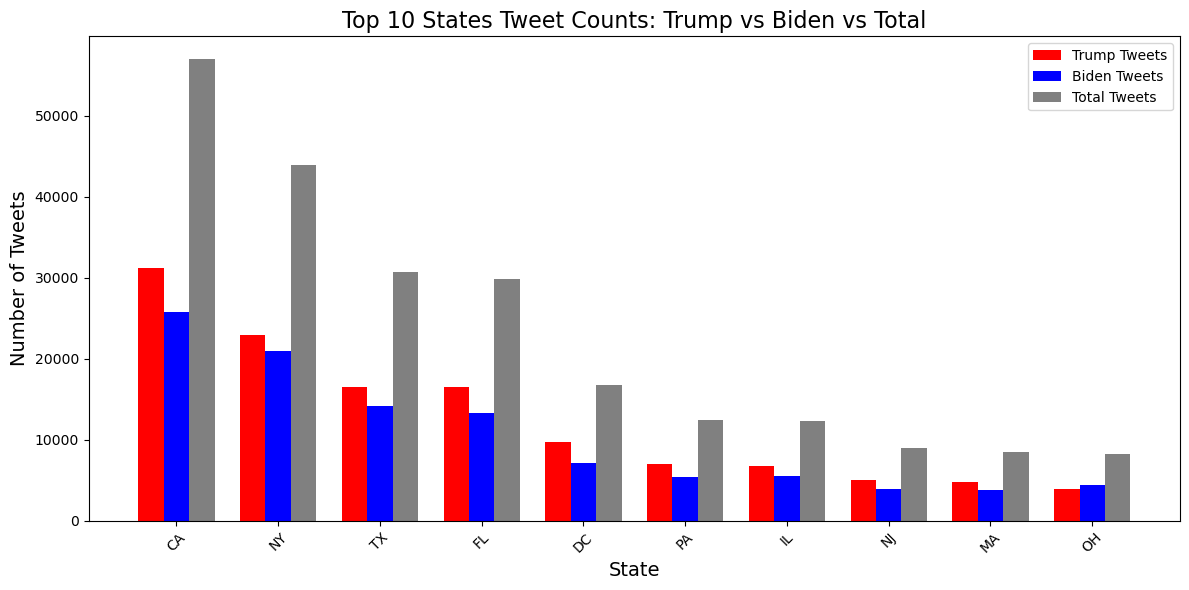

In [55]:
# Get the top 10 states based on total tweet counts
top_states = usa_combined_df.sort_values(by='total_tweets', ascending=False).head(10)

# Set the position of bars on the x-axis
bar_width = 0.25
x = range(len(top_states))

# Create a figure for the bar chart
plt.figure(figsize=(12, 6))

# Plot Trump tweets
plt.bar(x, top_states['trump_tweets'], width=bar_width, label='Trump Tweets', color='red', align='center')

# Plot Biden tweets
plt.bar([p + bar_width for p in x], top_states['biden_tweets'], width=bar_width, label='Biden Tweets', color='blue', align='center')

# Plot Total tweets
plt.bar([p + bar_width*2 for p in x], top_states['total_tweets'], width=bar_width, label='Total Tweets', color='gray', align='center')

# Adding labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.title('Top 10 States Tweet Counts: Trump vs Biden vs Total', fontsize=16)
plt.xticks([p + bar_width for p in x], top_states['state_code'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
# Calculate the color mapping based on the percentage difference
usa_combined_df['color'] = usa_combined_df['trump_percentage'] - usa_combined_df['biden_percentage']

# Create a choropleth map
fig = px.choropleth(
    usa_combined_df,
    locationmode='USA-states',
    locations='state_code',
    color='color',
    color_continuous_scale=[(1, 'red'), (0, 'blue')],
    range_color=[-100, 100],  # Adjust this range based on your data
    scope="usa",
    title='Biden vs Trump Tweet Percentages by State',
    hover_name='state_code',  # Show the state code on hover
    hover_data={
        'trump_percentage': True,  # Display Trump percentage
        'biden_percentage': True,   # Display Biden percentage
        'color': False              # Do not display the difference
    }
)

# Update layout for better visualization
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_x=0.5)

# Display the figure
fig.show()


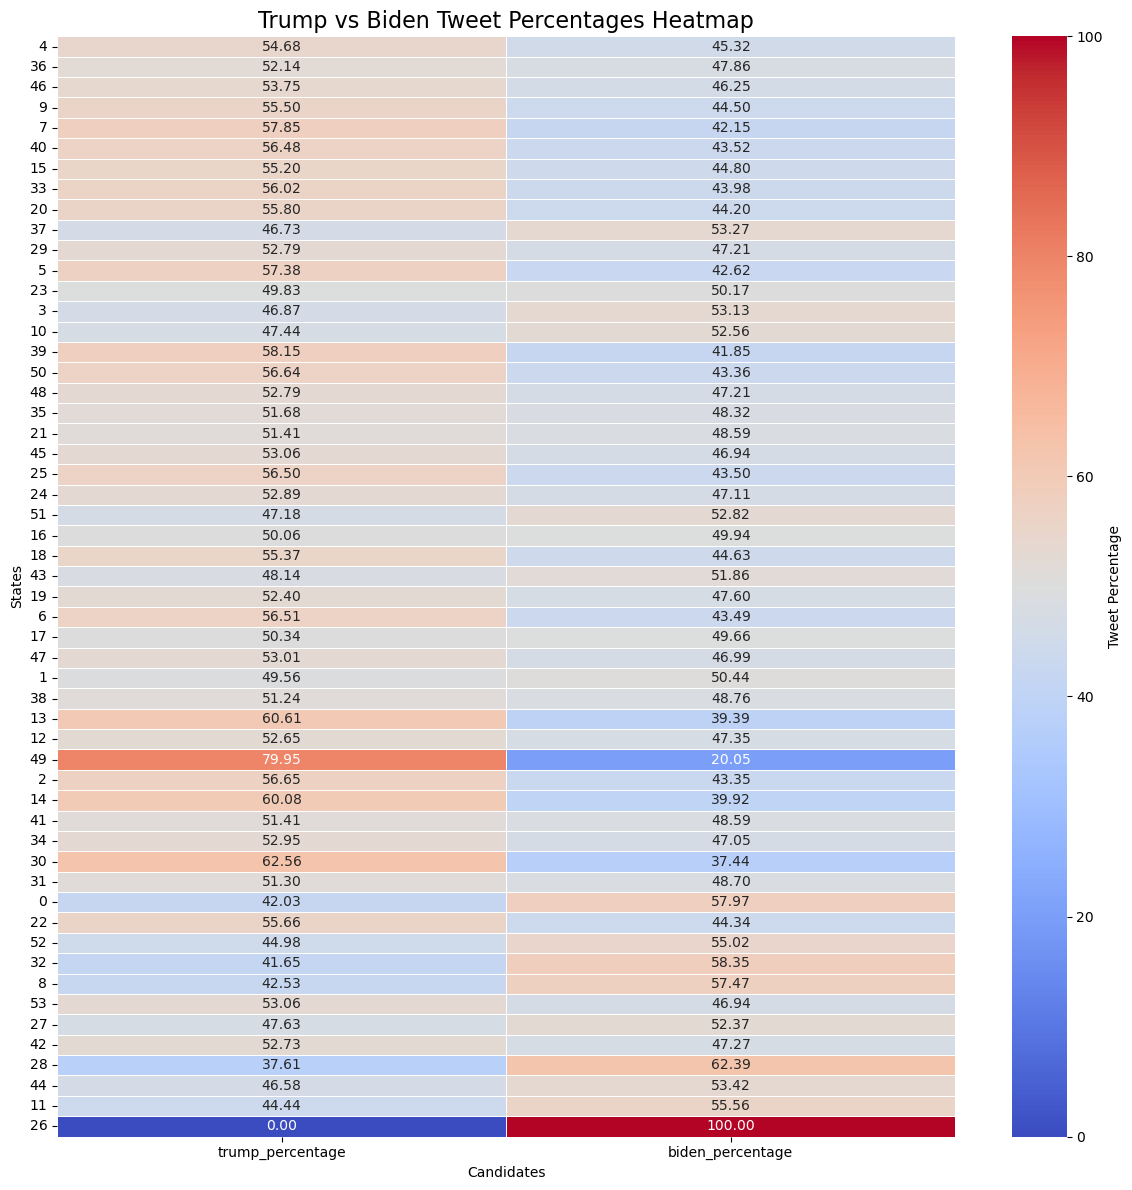

In [57]:
# Prepare data for the heatmap: only Trump and Biden percentages
heatmap_data = usa_combined_df[['trump_percentage', 'biden_percentage']]

# Set the figure size
plt.figure(figsize=(12, 12))  # Increase the height to accommodate state names

# Draw the heatmap and set y-axis labels to state names
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", 
            cbar_kws={'label': 'Tweet Percentage'}, yticklabels=usa_combined_df.index)

# Add a title
plt.title('Trump vs Biden Tweet Percentages Heatmap', fontsize=16)

# Rotate the y-axis labels (state names)
plt.yticks(rotation=0, fontsize=10)  # Rotate labels horizontally

# Adjust x and y labels
plt.xlabel('Candidates')
plt.ylabel('States')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

# Data Cleaning for Language Detection

1. **Lowercase Conversion:** Convert all tweets to lowercase to ensure uniformity.
2. **Remove Emojis:** Emojis can interfere with sentiment analysis. Remove them using regex.
3. **Remove URLs:** Tweets often contain URLs, which don't contribute to sentiment. Remove them with a regex.
4. **Remove Mentions & Hashtags:** User mentions (@user) or hashtags (#hashtag)

In [58]:
# Lowercase conversion
usa_trump_df['tweet'] = usa_trump_df['tweet'].str.lower()
usa_biden_df['tweet'] = usa_biden_df['tweet'].str.lower()


/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/1879051938.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/1879051938.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
# Remove emojis
import re
usa_trump_df['tweet'] = usa_trump_df['tweet'].apply(lambda x: re.sub(r'[^\w\s,]', '', x))
usa_biden_df['tweet'] = usa_biden_df['tweet'].apply(lambda x: re.sub(r'[^\w\s,]', '', x))

# usa_trump_df['tweet'].head(2)

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/2736930127.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/2736930127.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
# Remove URLs
usa_trump_df['tweet'] = usa_trump_df['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
usa_biden_df['tweet'] = usa_biden_df['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/3171398215.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/3171398215.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
# Remove mentions & hashtags
usa_trump_df['tweet'] = usa_trump_df['tweet'].apply(lambda x: re.sub(r'@\w+|#\w+', '', x))
usa_biden_df['tweet'] = usa_biden_df['tweet'].apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

# usa_trump_df['tweet'].head(10)

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/2984276328.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_27989/2984276328.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Language Detector with MediaPipe Tasks

**What is MediaPipe Language Detector?**

MediaPipe's Language Detector is a machine learning solution designed to identify the language of a given text. It is highly efficient and can be integrated into Python projects to process textual data, like tweets, and categorize them based on their language.



# NLTK (Natural Language Toolkit)

**NLTK** is a popular Python library used for natural language processing (NLP) tasks. It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for various tasks.

**Key Features**

1. **Tokenization**
   - Splitting text into words or sentences.

2. **Part-of-Speech Tagging**
   - Identifying the grammatical parts of speech for words in a sentence.

3. **Stemming and Lemmatization**
   - Reducing words to their base or root form.

4. **Text Classification**
   - Categorizing text into predefined classes.

5. **Named Entity Recognition (NER)**
   - Identifying proper nouns and other significant entities in text.

6. **Corpora**
   - Access to a large variety of text corpora and datasets for research and training.

**Usage**

NLTK is widely used in academia and industry for research in linguistics and machine learning, making it an essential tool for anyone working in the field of NLP.


In [62]:
import nltk

# Download the required NLTK corpora
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /Users/gulsah/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gulsah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gulsah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
from textblob import TextBlob # sentimental analysis

# Create a sample TextBlob
sample_text = "This is a good test sentence."
# sample_text = "it is certain 100% correct"
blob = TextBlob(sample_text)

print(blob.sentiment)

ModuleNotFoundError: No module named 'textblob'

5. **Remove Stopwords:** Common words like "the", "and", "is" might not be important for sentiment analysis, so removing them can improve accuracy.

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
usa_trump_df['tweet'] = usa_trump_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


In [ ]:
# Function to detect language
def detect_language(text):
    try:
        blob = TextBlob(text)
        return blob.detect_language()
    except Exception as e:
        return None  # Handle exceptions for undetectable languages


# Apply the function to the 'tweet' column
usa_trump_df['language'] = usa_trump_df['tweet'].apply(detect_language)

usa_trump_df.head(5)

In [119]:
# trump_df = pd.read_csv(r"/content/sample_data/hashtag_donaldtrump.csv",lineterminator='\n')
# biden_df = pd.read_csv(r"/content/sample_data/hashtag_joebiden.csv",lineterminator='\n')
trump_df = pd.read_csv(r"/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/csv/hashtag_donaldtrump.csv",lineterminator='\n')
biden_df = pd.read_csv(r"/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/csv/hashtag_joebiden.csv",lineterminator='\n')

In [ ]:
trump_df.info()

In [ ]:
biden_df.info()

In [ ]:
# Expl 4: Investigate The Most Retweeted Tweets - Trump
usa_trump_df_retweet = usa_trump_df.sort_values(by='retweet_count', ascending=False)
usa_trump_df_retweet.head(5)

In [ ]:
# Expl 4: Investigate The Most Retweeted Tweets - Biden
usa_biden_df_retweet = usa_biden_df.sort_values(by='retweet_count', ascending=False)
usa_biden_df_retweet.head(5)

In [ ]:
# Expl 6: Investigate The Most Liked Tweets - Trump
usa_trump_df_like = usa_trump_df.sort_values(by='likes', ascending=False)
usa_trump_df_like.head(5)

In [ ]:
# Expl 6: Investigate The Most Liked Tweets - Biden
usa_biden_df_like = usa_biden_df.sort_values(by='likes', ascending=False)
usa_biden_df_like.head(5)